In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix ,classification_report
import pyodbc
import numpy as np
import pandas as pd
import urllib
from sqlalchemy import create_engine
from sklearn.preprocessing import StandardScaler, LabelEncoder
import lightgbm as lgb
import msvcrt as m
from sklearn.model_selection import train_test_split
plt.style.use('ggplot')
pd.options.display.max_columns = None
pd.options.display.max_rows = 50

In [2]:
conn = pyodbc.connect('Driver={SQL Server};'
                      'Server=192.168.1.100;'
                      'Database=FD_Stage;'
                      'UID=eman.youssef;'
                      'PWD=3adda;')

In [10]:
sql = '''
       select distinct clm.PAID_AMT,
	   serv.ICD_CODE,
	   serv.sdl_code,
	   clm.TOT_CLM_GROSS_AMT,
	   clm.TOT_CLM_NET_AMT,
	   clm.PROVIDER_ID,
	   clm.AGE,
       clm.PORTAL_TRANS_ID,
	   clm.TOT_NON_PAY_AMT,
	   clm.TOT_PROCESSED_GROSS_AMT,
	   clm.BENEFIT_CAT,
	   clm.GENDER,
	   clm.CLAIM_TYPE,
       clm.FRAUD_CASE
       
from tbl_Claims_Submissions clm 
join tbl_claim_services serv
on clm.PORTAL_TRANS_ID = serv.PORTAL_TRANS_ID '''

In [73]:
data = pd.read_sql(sql,conn)

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920030 entries, 0 to 1920029
Data columns (total 14 columns):
PAID_AMT                   float64
ICD_CODE                   object
sdl_code                   float64
TOT_CLM_GROSS_AMT          float64
TOT_CLM_NET_AMT            float64
PROVIDER_ID                object
AGE                        float64
PORTAL_TRANS_ID            object
TOT_NON_PAY_AMT            float64
TOT_PROCESSED_GROSS_AMT    float64
BENEFIT_CAT                float64
GENDER                     object
CLAIM_TYPE                 object
FRAUD_CASE                 object
dtypes: float64(8), object(6)
memory usage: 205.1+ MB


In [75]:
def drop_dub(data):
    data.drop_duplicates(subset=['PORTAL_TRANS_ID'],inplace=True)
    return data

In [76]:
data = drop_dub(data)

In [77]:
def date_dataType(data):
    for i in data.columns:
        if i[-4:] == 'DATE':
            data[i] = pd.to_datetime(data[i])
    return data

In [78]:
# from scipy import stats
# counts = data_new.GENDER.value_counts()
# dist = stats.rv_discrete(values=(np.arange(counts.shape[0]),counts/counts.sum()))
# fill_idxs = dist.rvs(size=data_new.shape[0] - data_new.GENDER.count())
# data_new.loc[data_new.GENDER.isnull(), "GENDER"] = counts.iloc[fill_idxs].index.values

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131343 entries, 0 to 1920023
Data columns (total 14 columns):
PAID_AMT                   1003171 non-null float64
ICD_CODE                   1040276 non-null object
sdl_code                   287306 non-null float64
TOT_CLM_GROSS_AMT          1129627 non-null float64
TOT_CLM_NET_AMT            1129628 non-null float64
PROVIDER_ID                1131343 non-null object
AGE                        1037096 non-null float64
PORTAL_TRANS_ID            1131343 non-null object
TOT_NON_PAY_AMT            1002989 non-null float64
TOT_PROCESSED_GROSS_AMT    1003050 non-null float64
BENEFIT_CAT                1103327 non-null float64
GENDER                     731664 non-null object
CLAIM_TYPE                 1131343 non-null object
FRAUD_CASE                 1131333 non-null object
dtypes: float64(8), object(6)
memory usage: 129.5+ MB


In [80]:
def change_data_type(data):
    data.BENEFIT_CAT = data.BENEFIT_CAT.astype('O')
    data.sdl_code = data.sdl_code.astype('O')
    return data

In [81]:
data = change_data_type(data)

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131343 entries, 0 to 1920023
Data columns (total 14 columns):
PAID_AMT                   1003171 non-null float64
ICD_CODE                   1040276 non-null object
sdl_code                   287306 non-null object
TOT_CLM_GROSS_AMT          1129627 non-null float64
TOT_CLM_NET_AMT            1129628 non-null float64
PROVIDER_ID                1131343 non-null object
AGE                        1037096 non-null float64
PORTAL_TRANS_ID            1131343 non-null object
TOT_NON_PAY_AMT            1002989 non-null float64
TOT_PROCESSED_GROSS_AMT    1003050 non-null float64
BENEFIT_CAT                1103327 non-null object
GENDER                     731664 non-null object
CLAIM_TYPE                 1131343 non-null object
FRAUD_CASE                 1131333 non-null object
dtypes: float64(6), object(8)
memory usage: 129.5+ MB


In [83]:
# for i in data_new.columns:
#     if data_new[i].dtype == 'O':
#         counts = data_new[i].value_counts()
#         dist = stats.rv_discrete(values=(np.arange(counts.shape[0]),counts/counts.sum()))
#         fill_idxs = dist.rvs(size=data_new.shape[0] - data_new[i].count())
#         data_new.loc[data_new[i].isnull(), i] = counts.iloc[fill_idxs].index.values

In [84]:
# for i in data_new.columns:
#     if data_new[i].dtype == 'O':
#         counts = data_new[i].value_counts()
#         dist = stats.rv_discrete(values=(np.arange(counts.shape[0]),counts/counts.sum()))
#         fill_idxs = dist.rvs(size=data_new.shape[0] - data_new[i].count())
#         data_new.loc[data_new[i].isnull(), i] = counts.iloc[fill_idxs].index.values

In [85]:
def impute_float_cols(data):
    for i in data.columns:
        if data[i].dtype == 'float64':
            data[i] = data[i].fillna(data[i].mean())
    return data

In [86]:
data = impute_float_cols(data)

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131343 entries, 0 to 1920023
Data columns (total 14 columns):
PAID_AMT                   1131343 non-null float64
ICD_CODE                   1040276 non-null object
sdl_code                   287306 non-null object
TOT_CLM_GROSS_AMT          1131343 non-null float64
TOT_CLM_NET_AMT            1131343 non-null float64
PROVIDER_ID                1131343 non-null object
AGE                        1131343 non-null float64
PORTAL_TRANS_ID            1131343 non-null object
TOT_NON_PAY_AMT            1131343 non-null float64
TOT_PROCESSED_GROSS_AMT    1131343 non-null float64
BENEFIT_CAT                1103327 non-null object
GENDER                     731664 non-null object
CLAIM_TYPE                 1131343 non-null object
FRAUD_CASE                 1131333 non-null object
dtypes: float64(6), object(8)
memory usage: 129.5+ MB


In [92]:
def drop_nulls_target(data):
    data.dropna(subset=['FRAUD_CASE'],inplace=True)
    return data

In [93]:
data = drop_nulls_target(data)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131333 entries, 0 to 1920023
Data columns (total 14 columns):
PAID_AMT                   1131333 non-null float64
ICD_CODE                   1040266 non-null object
sdl_code                   287306 non-null object
TOT_CLM_GROSS_AMT          1131333 non-null float64
TOT_CLM_NET_AMT            1131333 non-null float64
PROVIDER_ID                1131333 non-null object
AGE                        1131333 non-null float64
PORTAL_TRANS_ID            1131333 non-null object
TOT_NON_PAY_AMT            1131333 non-null float64
TOT_PROCESSED_GROSS_AMT    1131333 non-null float64
BENEFIT_CAT                1103317 non-null object
GENDER                     731654 non-null object
CLAIM_TYPE                 1131333 non-null object
FRAUD_CASE                 1131333 non-null object
dtypes: float64(6), object(8)
memory usage: 129.5+ MB


In [95]:
def standarize_continous_data(data):
    for i in data.columns:
        if data[i].dtype == 'float64':
            scaler = StandardScaler()
            data[i] = scaler.fit_transform(data[i].values.reshape(-1,1))
    return data

In [96]:
data = standarize_continous_data(data)

In [98]:
def label_encode_categories(data):
    for i in data.columns:
        if data[i].dtype == 'O':
            LB = LabelEncoder()
            data[i] = LB.fit_transform(data[i].values.reshape(-1,1))
    return data

In [102]:
def impute_catgorical_nulls(data):
    for i in data.columns:
        if data[i].dtype == 'O':
            data[i].fillna('null',inplace=True)
    return data

In [105]:
data = impute_catgorical_nulls(data)

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131333 entries, 0 to 1920023
Data columns (total 14 columns):
PAID_AMT                   1131333 non-null float64
ICD_CODE                   1131333 non-null int32
sdl_code                   1131333 non-null object
TOT_CLM_GROSS_AMT          1131333 non-null float64
TOT_CLM_NET_AMT            1131333 non-null float64
PROVIDER_ID                1131333 non-null object
AGE                        1131333 non-null float64
PORTAL_TRANS_ID            1131333 non-null object
TOT_NON_PAY_AMT            1131333 non-null float64
TOT_PROCESSED_GROSS_AMT    1131333 non-null float64
BENEFIT_CAT                1131333 non-null object
GENDER                     1131333 non-null object
CLAIM_TYPE                 1131333 non-null object
FRAUD_CASE                 1131333 non-null object
dtypes: float64(6), int32(1), object(7)
memory usage: 125.2+ MB


In [108]:
def assure_strings(data):
    for i in data.columns:
        if data[i].dtype == 'O':
            data[i] = data[i].apply(lambda x:str(x))
    return data

In [109]:
data = assure_strings(data)

In [110]:
data = label_encode_categories(data)

D:\Users\Testing\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1131333 entries, 0 to 1920023
Data columns (total 14 columns):
PAID_AMT                   1131333 non-null float64
ICD_CODE                   1131333 non-null int32
sdl_code                   1131333 non-null int32
TOT_CLM_GROSS_AMT          1131333 non-null float64
TOT_CLM_NET_AMT            1131333 non-null float64
PROVIDER_ID                1131333 non-null int32
AGE                        1131333 non-null float64
PORTAL_TRANS_ID            1131333 non-null int32
TOT_NON_PAY_AMT            1131333 non-null float64
TOT_PROCESSED_GROSS_AMT    1131333 non-null float64
BENEFIT_CAT                1131333 non-null int32
GENDER                     1131333 non-null int32
CLAIM_TYPE                 1131333 non-null int32
FRAUD_CASE                 1131333 non-null int32
dtypes: float64(6), int32(8)
memory usage: 94.9 MB


In [113]:
data.FRAUD_CASE.value_counts()

0    1033879
2      53611
1      43843
Name: FRAUD_CASE, dtype: int64

In [115]:
def get_x_y(data):
    X = data.drop(['FRAUD_CASE'],axis=1)
    Y = data.FRAUD_CASE
    return X,Y

In [116]:
X,Y = get_x_y(data)

In [117]:
Y = Y.apply(lambda x : 1 if x != 0 else 0 )

In [118]:
X.shape,Y.shape

((1131333, 13), (1131333,))

In [127]:
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=42)

In [128]:
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)

In [123]:
params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47,
          'class_weights':class_weights
         }

In [124]:
from sklearn.model_selection import KFold, TimeSeriesSplit
from sklearn.metrics import roc_auc_score
from time import time
import datetime

In [138]:
folds = KFold(n_splits=3)

aucs = list()
feature_importances = pd.DataFrame()
feature_importances['feature'] = X_train.columns

training_start_time = time()
for fold, (trn_idx, test_idx) in enumerate(folds.split(X_train, y_train)):
    start_time = time()
    print('Training on fold {}'.format(fold + 1))
    
    trn_data = lgb.Dataset(X_train.iloc[trn_idx], label=y_train.iloc[trn_idx])
    val_data = lgb.Dataset(X_train.iloc[test_idx], label=y_train.iloc[test_idx])
    clf = lgb.train(params, trn_data, 200, valid_sets = [trn_data, val_data],verbose_eval=100, early_stopping_rounds=100)
    
    feature_importances['fold_{}'.format(fold + 1)] = clf.feature_importance()
    aucs.append(clf.best_score['valid_1']['auc'])
    
    print('Fold {} finished in {}'.format(fold + 1, str(datetime.timedelta(seconds=time() - start_time))))
print('-' * 30)
print('Training has finished.')
print('Total training time is {}'.format(str(datetime.timedelta(seconds=time() - training_start_time))))
print('Mean AUC:', np.mean(aucs))
print('-' * 30)

Training on fold 1
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.867067	valid_1's auc: 0.854158
[200]	training's auc: 0.878005	valid_1's auc: 0.86274
Did not meet early stopping. Best iteration is:
[200]	training's auc: 0.878005	valid_1's auc: 0.86274
Fold 1 finished in 0:00:39.876696
Training on fold 2
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.867465	valid_1's auc: 0.855348
[200]	training's auc: 0.878299	valid_1's auc: 0.86371
Did not meet early stopping. Best iteration is:
[200]	training's auc: 0.878299	valid_1's auc: 0.86371
Fold 2 finished in 0:00:38.856735
Training on fold 3
Training until validation scores don't improve for 100 rounds
[100]	training's auc: 0.86649	valid_1's auc: 0.857716
[200]	training's auc: 0.877717	valid_1's auc: 0.866624
Did not meet early stopping. Best iteration is:
[200]	training's auc: 0.877717	valid_1's auc: 0.866624
Fold 3 finished in 0:00:38.622341
---------------------

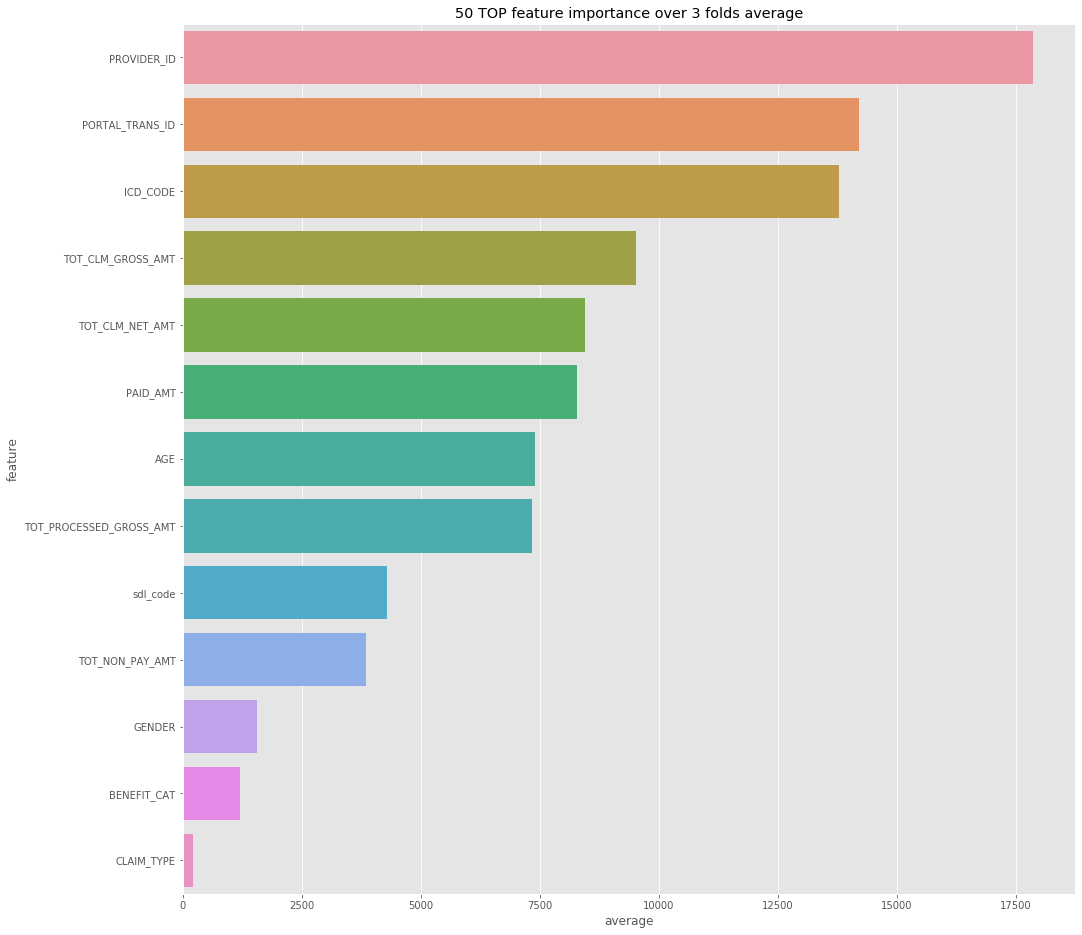

In [130]:
feature_importances['average'] = feature_importances[['fold_{}'.format(fold + 1) for fold in range(folds.n_splits)]].mean(axis=1)
feature_importances.to_csv('feature_importances.csv')

plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title('50 TOP feature importance over {} folds average'.format(folds.n_splits));

In [158]:
#clf right now is the last model, trained with 80% of data and validated with 20%
#best_iter = clf.best_iteration
clf = lgb.LGBMClassifier(**params, num_boost_round=3000)

In [149]:
# train_data = lgb.Dataset(X_train, label=y_train)

In [150]:
# lgb.cv(params, train_data, 2, nfold=5)

In [151]:
# clf_new = lgb.train(params, train_data, 100)

In [159]:
clf.fit(X_train,y_train,eval_set=[(X_test, y_test)],
        eval_metric='auc',
        early_stopping_rounds=300)

[1]	valid_0's auc: 0.767947
Training until validation scores don't improve for 300 rounds
[2]	valid_0's auc: 0.802704
[3]	valid_0's auc: 0.806056
[4]	valid_0's auc: 0.809837
[5]	valid_0's auc: 0.816451
[6]	valid_0's auc: 0.815056
[7]	valid_0's auc: 0.821837
[8]	valid_0's auc: 0.821887
[9]	valid_0's auc: 0.827006
[10]	valid_0's auc: 0.831558
[11]	valid_0's auc: 0.838724
[12]	valid_0's auc: 0.840315
[13]	valid_0's auc: 0.83877
[14]	valid_0's auc: 0.841067
[15]	valid_0's auc: 0.841688
[16]	valid_0's auc: 0.841707
[17]	valid_0's auc: 0.842846
[18]	valid_0's auc: 0.842718
[19]	valid_0's auc: 0.844899
[20]	valid_0's auc: 0.845473
[21]	valid_0's auc: 0.84431
[22]	valid_0's auc: 0.843381
[23]	valid_0's auc: 0.842477
[24]	valid_0's auc: 0.84179
[25]	valid_0's auc: 0.841827
[26]	valid_0's auc: 0.843312
[27]	valid_0's auc: 0.843795
[28]	valid_0's auc: 0.846115
[29]	valid_0's auc: 0.845943
[30]	valid_0's auc: 0.845736
[31]	valid_0's auc: 0.845398
[32]	valid_0's auc: 0.845586
[33]	valid_0's auc: 0.

[277]	valid_0's auc: 0.871612
[278]	valid_0's auc: 0.871615
[279]	valid_0's auc: 0.871679
[280]	valid_0's auc: 0.871754
[281]	valid_0's auc: 0.871825
[282]	valid_0's auc: 0.871858
[283]	valid_0's auc: 0.871893
[284]	valid_0's auc: 0.871919
[285]	valid_0's auc: 0.871916
[286]	valid_0's auc: 0.871945
[287]	valid_0's auc: 0.872094
[288]	valid_0's auc: 0.872099
[289]	valid_0's auc: 0.87214
[290]	valid_0's auc: 0.872117
[291]	valid_0's auc: 0.872179
[292]	valid_0's auc: 0.872225
[293]	valid_0's auc: 0.872365
[294]	valid_0's auc: 0.872425
[295]	valid_0's auc: 0.872479
[296]	valid_0's auc: 0.872592
[297]	valid_0's auc: 0.872671
[298]	valid_0's auc: 0.872698
[299]	valid_0's auc: 0.872709
[300]	valid_0's auc: 0.872715
[301]	valid_0's auc: 0.872727
[302]	valid_0's auc: 0.872877
[303]	valid_0's auc: 0.872882
[304]	valid_0's auc: 0.872962
[305]	valid_0's auc: 0.872974
[306]	valid_0's auc: 0.873025
[307]	valid_0's auc: 0.873105
[308]	valid_0's auc: 0.873112
[309]	valid_0's auc: 0.873175
[310]	valid

[552]	valid_0's auc: 0.882193
[553]	valid_0's auc: 0.882206
[554]	valid_0's auc: 0.882287
[555]	valid_0's auc: 0.882322
[556]	valid_0's auc: 0.882341
[557]	valid_0's auc: 0.882372
[558]	valid_0's auc: 0.882384
[559]	valid_0's auc: 0.882392
[560]	valid_0's auc: 0.882415
[561]	valid_0's auc: 0.882449
[562]	valid_0's auc: 0.882486
[563]	valid_0's auc: 0.882517
[564]	valid_0's auc: 0.88255
[565]	valid_0's auc: 0.882577
[566]	valid_0's auc: 0.882581
[567]	valid_0's auc: 0.882585
[568]	valid_0's auc: 0.882606
[569]	valid_0's auc: 0.882615
[570]	valid_0's auc: 0.88269
[571]	valid_0's auc: 0.882692
[572]	valid_0's auc: 0.882721
[573]	valid_0's auc: 0.882747
[574]	valid_0's auc: 0.88277
[575]	valid_0's auc: 0.882779
[576]	valid_0's auc: 0.882816
[577]	valid_0's auc: 0.882816
[578]	valid_0's auc: 0.88287
[579]	valid_0's auc: 0.88291
[580]	valid_0's auc: 0.882919
[581]	valid_0's auc: 0.88293
[582]	valid_0's auc: 0.882947
[583]	valid_0's auc: 0.883019
[584]	valid_0's auc: 0.883052
[585]	valid_0's 

[827]	valid_0's auc: 0.888562
[828]	valid_0's auc: 0.888579
[829]	valid_0's auc: 0.888595
[830]	valid_0's auc: 0.888618
[831]	valid_0's auc: 0.888641
[832]	valid_0's auc: 0.88868
[833]	valid_0's auc: 0.888681
[834]	valid_0's auc: 0.888707
[835]	valid_0's auc: 0.888714
[836]	valid_0's auc: 0.888756
[837]	valid_0's auc: 0.888803
[838]	valid_0's auc: 0.888818
[839]	valid_0's auc: 0.888827
[840]	valid_0's auc: 0.888872
[841]	valid_0's auc: 0.888876
[842]	valid_0's auc: 0.88892
[843]	valid_0's auc: 0.888939
[844]	valid_0's auc: 0.888955
[845]	valid_0's auc: 0.888969
[846]	valid_0's auc: 0.888982
[847]	valid_0's auc: 0.888988
[848]	valid_0's auc: 0.889003
[849]	valid_0's auc: 0.889019
[850]	valid_0's auc: 0.889036
[851]	valid_0's auc: 0.889085
[852]	valid_0's auc: 0.8891
[853]	valid_0's auc: 0.889128
[854]	valid_0's auc: 0.889136
[855]	valid_0's auc: 0.889183
[856]	valid_0's auc: 0.889184
[857]	valid_0's auc: 0.889191
[858]	valid_0's auc: 0.88921
[859]	valid_0's auc: 0.889224
[860]	valid_0's

[1099]	valid_0's auc: 0.892829
[1100]	valid_0's auc: 0.892842
[1101]	valid_0's auc: 0.892847
[1102]	valid_0's auc: 0.892855
[1103]	valid_0's auc: 0.892863
[1104]	valid_0's auc: 0.892878
[1105]	valid_0's auc: 0.892881
[1106]	valid_0's auc: 0.892884
[1107]	valid_0's auc: 0.892906
[1108]	valid_0's auc: 0.892913
[1109]	valid_0's auc: 0.892918
[1110]	valid_0's auc: 0.892932
[1111]	valid_0's auc: 0.89294
[1112]	valid_0's auc: 0.892949
[1113]	valid_0's auc: 0.892955
[1114]	valid_0's auc: 0.892966
[1115]	valid_0's auc: 0.892974
[1116]	valid_0's auc: 0.892988
[1117]	valid_0's auc: 0.893012
[1118]	valid_0's auc: 0.893021
[1119]	valid_0's auc: 0.893029
[1120]	valid_0's auc: 0.893036
[1121]	valid_0's auc: 0.893058
[1122]	valid_0's auc: 0.893066
[1123]	valid_0's auc: 0.893074
[1124]	valid_0's auc: 0.893074
[1125]	valid_0's auc: 0.893084
[1126]	valid_0's auc: 0.893091
[1127]	valid_0's auc: 0.893098
[1128]	valid_0's auc: 0.89311
[1129]	valid_0's auc: 0.89311
[1130]	valid_0's auc: 0.89312
[1131]	valid

[1365]	valid_0's auc: 0.895265
[1366]	valid_0's auc: 0.895275
[1367]	valid_0's auc: 0.895277
[1368]	valid_0's auc: 0.895306
[1369]	valid_0's auc: 0.895311
[1370]	valid_0's auc: 0.895316
[1371]	valid_0's auc: 0.89533
[1372]	valid_0's auc: 0.895338
[1373]	valid_0's auc: 0.895359
[1374]	valid_0's auc: 0.895365
[1375]	valid_0's auc: 0.895365
[1376]	valid_0's auc: 0.895391
[1377]	valid_0's auc: 0.895414
[1378]	valid_0's auc: 0.895416
[1379]	valid_0's auc: 0.895428
[1380]	valid_0's auc: 0.895434
[1381]	valid_0's auc: 0.895439
[1382]	valid_0's auc: 0.895445
[1383]	valid_0's auc: 0.895449
[1384]	valid_0's auc: 0.895452
[1385]	valid_0's auc: 0.895454
[1386]	valid_0's auc: 0.895457
[1387]	valid_0's auc: 0.895465
[1388]	valid_0's auc: 0.895465
[1389]	valid_0's auc: 0.895485
[1390]	valid_0's auc: 0.895487
[1391]	valid_0's auc: 0.895491
[1392]	valid_0's auc: 0.895499
[1393]	valid_0's auc: 0.895501
[1394]	valid_0's auc: 0.895506
[1395]	valid_0's auc: 0.895519
[1396]	valid_0's auc: 0.895538
[1397]	va

[1632]	valid_0's auc: 0.897101
[1633]	valid_0's auc: 0.897111
[1634]	valid_0's auc: 0.897118
[1635]	valid_0's auc: 0.897123
[1636]	valid_0's auc: 0.897126
[1637]	valid_0's auc: 0.897127
[1638]	valid_0's auc: 0.897142
[1639]	valid_0's auc: 0.897154
[1640]	valid_0's auc: 0.897159
[1641]	valid_0's auc: 0.89716
[1642]	valid_0's auc: 0.897166
[1643]	valid_0's auc: 0.897185
[1644]	valid_0's auc: 0.897186
[1645]	valid_0's auc: 0.897195
[1646]	valid_0's auc: 0.897197
[1647]	valid_0's auc: 0.897203
[1648]	valid_0's auc: 0.89722
[1649]	valid_0's auc: 0.897234
[1650]	valid_0's auc: 0.89724
[1651]	valid_0's auc: 0.897241
[1652]	valid_0's auc: 0.897242
[1653]	valid_0's auc: 0.897256
[1654]	valid_0's auc: 0.897258
[1655]	valid_0's auc: 0.897262
[1656]	valid_0's auc: 0.897267
[1657]	valid_0's auc: 0.897272
[1658]	valid_0's auc: 0.897273
[1659]	valid_0's auc: 0.897279
[1660]	valid_0's auc: 0.897286
[1661]	valid_0's auc: 0.897291
[1662]	valid_0's auc: 0.897291
[1663]	valid_0's auc: 0.897297
[1664]	vali

[1899]	valid_0's auc: 0.898399
[1900]	valid_0's auc: 0.898401
[1901]	valid_0's auc: 0.898403
[1902]	valid_0's auc: 0.898416
[1903]	valid_0's auc: 0.898427
[1904]	valid_0's auc: 0.898433
[1905]	valid_0's auc: 0.89844
[1906]	valid_0's auc: 0.898443
[1907]	valid_0's auc: 0.898448
[1908]	valid_0's auc: 0.898454
[1909]	valid_0's auc: 0.898455
[1910]	valid_0's auc: 0.898456
[1911]	valid_0's auc: 0.898468
[1912]	valid_0's auc: 0.898468
[1913]	valid_0's auc: 0.898472
[1914]	valid_0's auc: 0.898478
[1915]	valid_0's auc: 0.898478
[1916]	valid_0's auc: 0.898477
[1917]	valid_0's auc: 0.898478
[1918]	valid_0's auc: 0.898478
[1919]	valid_0's auc: 0.898496
[1920]	valid_0's auc: 0.898498
[1921]	valid_0's auc: 0.898502
[1922]	valid_0's auc: 0.898504
[1923]	valid_0's auc: 0.898507
[1924]	valid_0's auc: 0.898508
[1925]	valid_0's auc: 0.898527
[1926]	valid_0's auc: 0.898532
[1927]	valid_0's auc: 0.898533
[1928]	valid_0's auc: 0.898547
[1929]	valid_0's auc: 0.898551
[1930]	valid_0's auc: 0.898565
[1931]	va

[2164]	valid_0's auc: 0.89946
[2165]	valid_0's auc: 0.899461
[2166]	valid_0's auc: 0.899465
[2167]	valid_0's auc: 0.899469
[2168]	valid_0's auc: 0.899469
[2169]	valid_0's auc: 0.899471
[2170]	valid_0's auc: 0.899474
[2171]	valid_0's auc: 0.899474
[2172]	valid_0's auc: 0.899477
[2173]	valid_0's auc: 0.899482
[2174]	valid_0's auc: 0.899486
[2175]	valid_0's auc: 0.899487
[2176]	valid_0's auc: 0.89949
[2177]	valid_0's auc: 0.899496
[2178]	valid_0's auc: 0.899501
[2179]	valid_0's auc: 0.899505
[2180]	valid_0's auc: 0.899508
[2181]	valid_0's auc: 0.89951
[2182]	valid_0's auc: 0.899513
[2183]	valid_0's auc: 0.899514
[2184]	valid_0's auc: 0.899519
[2185]	valid_0's auc: 0.899519
[2186]	valid_0's auc: 0.89952
[2187]	valid_0's auc: 0.899522
[2188]	valid_0's auc: 0.899526
[2189]	valid_0's auc: 0.899528
[2190]	valid_0's auc: 0.899532
[2191]	valid_0's auc: 0.899534
[2192]	valid_0's auc: 0.899545
[2193]	valid_0's auc: 0.899548
[2194]	valid_0's auc: 0.899554
[2195]	valid_0's auc: 0.899554
[2196]	valid

[2430]	valid_0's auc: 0.90034
[2431]	valid_0's auc: 0.900341
[2432]	valid_0's auc: 0.900352
[2433]	valid_0's auc: 0.900355
[2434]	valid_0's auc: 0.900362
[2435]	valid_0's auc: 0.900362
[2436]	valid_0's auc: 0.900363
[2437]	valid_0's auc: 0.900363
[2438]	valid_0's auc: 0.900365
[2439]	valid_0's auc: 0.900366
[2440]	valid_0's auc: 0.900366
[2441]	valid_0's auc: 0.900371
[2442]	valid_0's auc: 0.900372
[2443]	valid_0's auc: 0.900375
[2444]	valid_0's auc: 0.900377
[2445]	valid_0's auc: 0.900378
[2446]	valid_0's auc: 0.900382
[2447]	valid_0's auc: 0.900392
[2448]	valid_0's auc: 0.900397
[2449]	valid_0's auc: 0.9004
[2450]	valid_0's auc: 0.900403
[2451]	valid_0's auc: 0.900405
[2452]	valid_0's auc: 0.900412
[2453]	valid_0's auc: 0.900413
[2454]	valid_0's auc: 0.900414
[2455]	valid_0's auc: 0.900416
[2456]	valid_0's auc: 0.900416
[2457]	valid_0's auc: 0.900418
[2458]	valid_0's auc: 0.900419
[2459]	valid_0's auc: 0.900422
[2460]	valid_0's auc: 0.900425
[2461]	valid_0's auc: 0.900424
[2462]	vali

[2696]	valid_0's auc: 0.901055
[2697]	valid_0's auc: 0.901056
[2698]	valid_0's auc: 0.901055
[2699]	valid_0's auc: 0.901057
[2700]	valid_0's auc: 0.901059
[2701]	valid_0's auc: 0.901062
[2702]	valid_0's auc: 0.901062
[2703]	valid_0's auc: 0.901064
[2704]	valid_0's auc: 0.901064
[2705]	valid_0's auc: 0.901064
[2706]	valid_0's auc: 0.901066
[2707]	valid_0's auc: 0.901067
[2708]	valid_0's auc: 0.901075
[2709]	valid_0's auc: 0.901083
[2710]	valid_0's auc: 0.901085
[2711]	valid_0's auc: 0.901087
[2712]	valid_0's auc: 0.901087
[2713]	valid_0's auc: 0.90109
[2714]	valid_0's auc: 0.901093
[2715]	valid_0's auc: 0.901096
[2716]	valid_0's auc: 0.901097
[2717]	valid_0's auc: 0.901101
[2718]	valid_0's auc: 0.901105
[2719]	valid_0's auc: 0.901107
[2720]	valid_0's auc: 0.901109
[2721]	valid_0's auc: 0.901111
[2722]	valid_0's auc: 0.901112
[2723]	valid_0's auc: 0.901115
[2724]	valid_0's auc: 0.90112
[2725]	valid_0's auc: 0.901122
[2726]	valid_0's auc: 0.901125
[2727]	valid_0's auc: 0.901127
[2728]	val

[2962]	valid_0's auc: 0.901571
[2963]	valid_0's auc: 0.901571
[2964]	valid_0's auc: 0.901574
[2965]	valid_0's auc: 0.901577
[2966]	valid_0's auc: 0.901577
[2967]	valid_0's auc: 0.90158
[2968]	valid_0's auc: 0.901582
[2969]	valid_0's auc: 0.901586
[2970]	valid_0's auc: 0.90159
[2971]	valid_0's auc: 0.901593
[2972]	valid_0's auc: 0.901596
[2973]	valid_0's auc: 0.901597
[2974]	valid_0's auc: 0.901598
[2975]	valid_0's auc: 0.901603
[2976]	valid_0's auc: 0.901603
[2977]	valid_0's auc: 0.901604
[2978]	valid_0's auc: 0.901613
[2979]	valid_0's auc: 0.901612
[2980]	valid_0's auc: 0.901613
[2981]	valid_0's auc: 0.901615
[2982]	valid_0's auc: 0.901616
[2983]	valid_0's auc: 0.901623
[2984]	valid_0's auc: 0.901626
[2985]	valid_0's auc: 0.901629
[2986]	valid_0's auc: 0.901632
[2987]	valid_0's auc: 0.901635
[2988]	valid_0's auc: 0.901638
[2989]	valid_0's auc: 0.90164
[2990]	valid_0's auc: 0.901644
[2991]	valid_0's auc: 0.901648
[2992]	valid_0's auc: 0.901659
[2993]	valid_0's auc: 0.901661
[2994]	vali

LGBMClassifier(bagging_fraction=0.4181193142567742, bagging_seed=11,
               boosting_type='gbdt', class_weight=None,
               class_weights=array([0.54713027, 5.8044462 ]),
               colsample_bytree=1.0, feature_fraction=0.3797454081646243,
               importance_type='split', learning_rate=0.006883242363721497,
               max_depth=-1, metric='auc', min_child_samples=20,
               min_child_weight=0.03454472573214212, min_data_in_leaf=106,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1,
               num_boost_round=3000, num_leaves=491, objective='binary',
               random_state=47, reg_alpha=0.3899927210061127,
               reg_lambda=0.6485237330340494, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0, verbosity=-1)

In [196]:
y_pred = clf.predict_proba(X_test)

In [206]:
y_pred[:,1]

array([0.06369895, 0.00921891, 0.09122258, ..., 0.03713329, 0.01885906,
       0.00030746])

In [154]:
#y_pred_classes = pd.Series(y_pred[:,1]).apply(lambda x: 1 if x >=0.2 else 0)

In [198]:
#y_pred_classes = pd.Series(y_pred).apply(lambda x: 1 if x >=0.5 else 0)

In [202]:
y_pred_classes = pd.Series(y_pred[:,1]).apply(lambda x: 1 if x >=0.1 else 0)

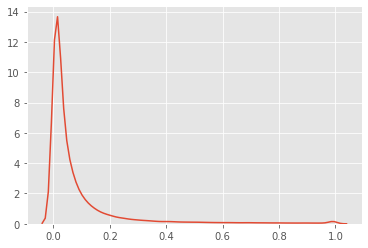

In [207]:
sns.kdeplot(y_pred[:,1])

In [203]:

print("Classification report  \n%s\n"
      % ( classification_report(y_test, y_pred_classes)))
print("Confusion matrix:\n%s" % confusion_matrix(y_test,y_pred_classes))

Classification report  
              precision    recall  f1-score   support

           0       0.98      0.84      0.91    206986
           1       0.32      0.79      0.46     19281

    accuracy                           0.84    226267
   macro avg       0.65      0.82      0.68    226267
weighted avg       0.92      0.84      0.87    226267


Confusion matrix:
[[174899  32087]
 [  4140  15141]]


In [224]:
clf.booster_.save_model('fraud_classefier.txt')